In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lasio
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
import sklearn.model_selection as ms
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb

In [2]:
def log_plot(logs):
    logs = logs.sort_values(by='DEPTH')
    top = logs.DEPTH.min()
    bot = logs.DEPTH.max()
    
    f, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,8))
    ax[0].plot(logs.DT, logs.DEPTH, color='red')
    ax[1].plot(logs.GR, logs.DEPTH, color='black')
    ax[2].plot(logs.NPHI, logs.DEPTH, color='blue')
    ax[3].plot(logs.RHOB, logs.DEPTH, color='c')
    ax[4].plot(logs.RT, logs.DEPTH, color='m')
    
    for i in range(len(ax)):
        ax[i].set_ylim(top,bot)
        ax[i].invert_yaxis()
        ax[i].grid()
        
    ax[0].set_xlabel("DT (us/ft)")
    ax[0].set_xlim(30, 150)
    ax[0].set_ylabel("Depth(ft)")
    ax[1].set_xlabel("GR (API)")
    ax[1].set_xlim(logs.GR.min(), 200)
    ax[2].set_xlabel("NPHI (v/v)")
    ax[2].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[3].set_xlabel("RHOB (g/cm3)")
    ax[3].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[4].set_xlabel("RT (ohm.m)")
    ax[4].set_xlim(-2,logs.RT.max())
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]);
    ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[4].set_yticklabels([]) 
    
    f.suptitle('Well: 15-9-F-11', fontsize=14,y=0.94)

In [67]:
def log_plot1(logs):
    logs = logs.sort_values(by='DEPTH')
    top = logs.DEPTH.min()
    bot = logs.DEPTH.max()
    
    f, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,8))
    ax[0].plot(logs.DT, logs.DEPTH, color='red')
    ax[1].plot(logs.GR, logs.DEPTH, color='black')
    ax[2].plot(logs.NPHI, logs.DEPTH, color='blue')
    ax[3].plot(logs.RHOB, logs.DEPTH, color='c')
    ax[4].plot(logs.RT, logs.DEPTH, color='m')
    
    for i in range(len(ax)):
        ax[i].set_ylim(top,bot)
        ax[i].invert_yaxis()
        ax[i].grid()
        
    ax[0].set_xlabel("DT (us/ft)")
    ax[0].set_xlim(50, logs.DT.max())
    ax[0].set_ylabel("Depth(ft)")
    ax[1].set_xlabel("GR (API)")
    ax[1].set_xlim(logs.GR.min(), 200)
    ax[2].set_xlabel("NPHI (v/v)")
    ax[2].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[3].set_xlabel("RHOB (g/cm3)")
    ax[3].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[4].set_xlabel("RT (ohm.m)")
    ax[4].set_xlim(-2,logs.RT.max())
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]);
    ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[4].set_yticklabels([]) 
    
    f.suptitle('Well: 15-9-F-11', fontsize=14,y=0.94)

In [6]:
df = pd.read_csv('f1.csv')
df1 = df.dropna()
test = pd.read_csv('edited.csv')
test = test.dropna()

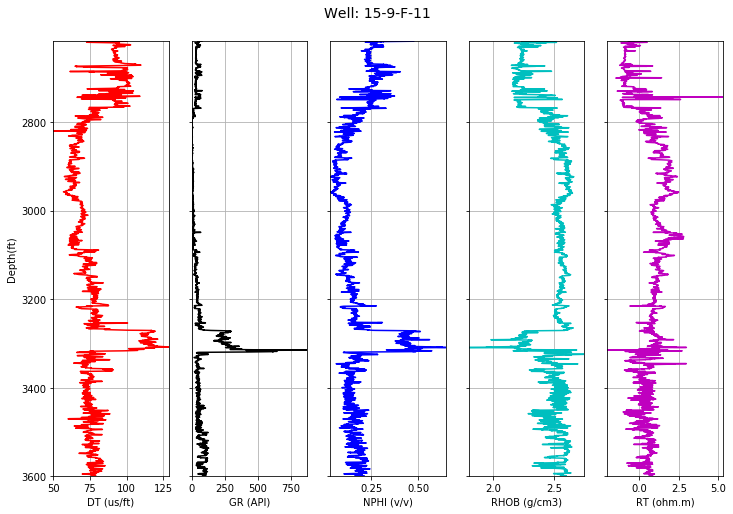

In [10]:
log_plot1(test)

In [11]:
labels = np.array(df1['DT'])
df1 = df1.drop(['DEPTH', 'DT'], axis=1)
features = np.array(df1)

## Randomly sample cases to create independent training and test data
np.random.seed(9988)
indx = range(features.shape[0])
indx = ms.train_test_split(indx, test_size = 0.4)
x_train = features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

## Randomly sample cases to create independent training and test data
np.random.seed(9988)
indx1 = range(x_test.shape[0])
indx1 = ms.train_test_split(indx1, test_size = 0.5)
x_test1 = x_test[indx1[0],:]
y_test1 = np.ravel(y_test[indx1[0]])
x_test2 = x_test[indx1[1],:]
y_test2 = np.ravel(y_test[indx1[1]])

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(26254, 4)
(26254,)
(17503, 4)
(17503,)


In [13]:
print(x_test1.shape)
print(y_test1.shape)
print(x_test2.shape)
print(y_test2.shape)

(8751, 4)
(8751,)
(8752, 4)
(8752,)


In [14]:
df1.shape

(43757, 4)

In [17]:
params = {'n_estimators': [300, 400, 600, 800, 1000],
         
         'max_depth': [10, 12, 14, 16, 18]}

rf = RandomForestRegressor()

grid_rf = GridSearchCV(estimator=rf, param_grid=params, scoring='r2', cv=5,
                      verbose=3, n_jobs=-1)

grid_rf.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 79.5min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [300, 400, 600, 800, 1000], 'max_depth': [10, 12, 14, 16, 18]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=3)

In [19]:
print(grid_rf.best_estimator_)
print(grid_rf.score(x_test, y_test))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
0.9619992941692883


In [20]:
rf = RandomForestRegressor(n_estimators=600, max_depth=18, min_samples_split=2, min_samples_leaf=1,
                         max_features='auto')
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [21]:
pred_rf = rf.predict(x_test)

print(f'The R2_score of DT values predicted on the validation data is {r2_score(pred_rf, y_test) * 100}')

The R2_score of DT values predicted on the validation data is 96.07717556766154


In [22]:
test = pd.read_csv('edited.csv')
test = test.dropna()

dt = np.array(test['DT'])
test_enc = test.drop(['DT', 'DEPTH'], axis=1)
test_enc = np.array(test_enc)
predictions_rf = rf.predict(test_enc)

In [33]:
ext = ExtraTreesRegressor(n_estimators=600, max_depth=18, min_samples_split=2, min_samples_leaf=1,
                         max_features='auto')
ext.fit(x_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=18,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [34]:
pred_ext = ext.predict(x_test)

print(f'The R2_score of DT values predicted on the validation data is {r2_score(pred_ext, y_test) * 100}')

The R2_score of DT values predicted on the validation data is 96.17913526260568


In [32]:
dtr = DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=1, min_impurity_split=2)
dtr.fit(x_train, y_train)
pred_dtr = dtr.predict(x_test)
print(f'The R2_score of DT values predicted on the validation data is {r2_score(pred_dtr, y_test) * 100}')

The R2_score of DT values predicted on the validation data is 94.63348199925927


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


In [35]:
test = pd.read_csv('edited.csv')
test = test.dropna()

dt = np.array(test['DT'])
test_enc = test.drop(['DT', 'DEPTH'], axis=1)
test_enc = np.array(test_enc)
predictions_ext = ext.predict(test_enc)

In [36]:
test = pd.read_csv('edited.csv')
test = test.dropna()

dt = np.array(test['DT'])
test_enc = test.drop(['DT', 'DEPTH'], axis=1)
test_enc = np.array(test_enc)
predictions_rf = rf.predict(test_enc)

In [43]:
print(dt[0:20])
print('')
print(predictions_rf[0:20])
print('')
print(predictions_ext[0:20])
print('')
print(avg[0:20])

[ 99.8262  99.9305 100.1234 100.2931 100.3768 100.3044  99.936   99.4008
  98.6239  97.598   96.3773  94.7912  93.0824  91.5045  90.6239  90.6975
  91.3562  92.7363  94.0159  95.0821]

[ 86.34746384  96.33176534 105.71022642 108.63794196 107.42177667
 102.35096331 101.29789907  99.69062976 102.5739967  101.32098562
 105.70192257 103.41681671  99.13083145 100.81862106 101.59671916
  98.95411729  97.96337249  99.7978998   98.92209189  99.88183516]

[ 80.87875899  96.29761237 105.81689449 108.84453281 108.32272944
 103.17903382 100.24154185 101.91455743 103.22494395 102.28523223
 105.3411128  104.66723437 100.89725779 101.50148342 101.69658528
  99.71402612  99.43888718 100.62099556  99.96474589  99.47393053]

[ 83.61311141  96.31468886 105.76356045 108.74123738 107.87225306
 102.76499856 100.76972046 100.80259359 102.89947033 101.80310892
 105.52151769 104.04202554 100.01404462 101.16005224 101.64665222
  99.3340717   98.70112983 100.20944768  99.44341889  99.67788285]


In [40]:
print(f'The RMSE of DT values predicted on the validation data is {mean_squared_error(predictions_ext, dt) ** 0.5}')
print(f'The R2_score of DT values predicted on the validation data is {r2_score(predictions_ext, dt) * 100}')

The RMSE of DT values predicted on the validation data is 5.206456747145209
The R2_score of DT values predicted on the validation data is 84.86037090777067


In [41]:
print(f'The RMSE of DT values predicted on the validation data is {mean_squared_error(predictions_rf, dt) ** 0.5}')
print(f'The R2_score of DT values predicted on the validation data is {r2_score(predictions_rf, dt) * 100}')

The RMSE of DT values predicted on the validation data is 5.495107833458426
The R2_score of DT values predicted on the validation data is 83.11014853970057


In [42]:
avg = (predictions_rf + predictions_ext)/2

In [44]:
print(f'The RMSE of DT values predicted on the validation data is {mean_squared_error(avg, dt) ** 0.5}')
print(f'The R2_score of DT values predicted on the validation data is {r2_score(avg, dt) * 100}')

The RMSE of DT values predicted on the validation data is 5.286680395575114
The R2_score of DT values predicted on the validation data is 84.31743002610051


In [45]:
rf1 = RandomForestRegressor(n_estimators=800, max_depth=18, min_samples_split=2, min_samples_leaf=1,
                         max_features='auto')
rf1.fit(features, labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [62]:
rf1 = RandomForestRegressor(n_estimators=800, max_depth=18, min_samples_split=2, min_samples_leaf=1,
                         max_features='auto')
rf1.fit(features, labels)
pred_rf1 = rf1.predict(test_enc)

print(f'The RMSE of DT values predicted on the validation data is {mean_squared_error(pred_rf1, dt) ** 0.5}')
print(f'The R2_score of DT values predicted on the validation data is {r2_score(pred_rf1, dt) * 100}')

The RMSE of DT values predicted on the validation data is 5.716075012213039
The R2_score of DT values predicted on the validation data is 81.8644498099245


In [47]:
ext1 = ExtraTreesRegressor(n_estimators=800, max_depth=18, min_samples_split=2, min_samples_leaf=1,
                         max_features='auto')
ext1.fit(features, labels)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=18,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [54]:
ext1 = ExtraTreesRegressor(n_estimators=800, max_depth=18, min_samples_split=2, min_samples_leaf=1,
                         max_features='auto')
ext1.fit(features, labels)
pred_ext1 = ext1.predict(test_enc)

print(f'The RMSE of DT values predicted on the validation data is {mean_squared_error(pred_ext1, dt) ** 0.5}')
print(f'The R2_score of DT values predicted on the validation data is {r2_score(pred_ext1, dt) * 100}')

The RMSE of DT values predicted on the validation data is 5.490386041865141
The R2_score of DT values predicted on the validation data is 83.35358656822471


In [51]:
dtr1 = DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=1, min_impurity_split=2)
dtr1.fit(features, labels)
pred_dtr1 = dtr1.predict(test_enc)

print(f'The RMSE of DT values predicted on the validation data is {mean_squared_error(pred_dtr1, dt) ** 0.5}')
print(f'The R2_score of DT values predicted on the validation data is {r2_score(pred_dtr1, dt) * 100}')

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


The RMSE of DT values predicted on the validation data is 5.856045989810258
The R2_score of DT values predicted on the validation data is 81.76710709843991


In [52]:
print(dt[0:20])
print('')
print(pred_dtr[0:20])
print('')
print(pred_ext[0:20])
print('')
print(pred_rf[0:20])

[ 99.8262  99.9305 100.1234 100.2931 100.3768 100.3044  99.936   99.4008
  98.6239  97.598   96.3773  94.7912  93.0824  91.5045  90.6239  90.6975
  91.3562  92.7363  94.0159  95.0821]

[ 66.97458276  98.44619083  70.37638787 104.47376161  81.53586486
  68.34033602 124.77016492  64.30391549  70.37638787  84.88136132
  65.83826173 130.96814371  68.34033602  91.01064981  92.53222218
  69.38441239  75.10060686  69.6183615   78.60107426 116.35363918]

[ 66.39358988 100.6097456   69.98713362  96.54470795  79.45599327
  68.72552103 128.45672624  63.59583799  72.75404457  83.2159926
  65.2360973  135.00118049  67.74167196  95.13757583  96.9415718
  68.97260315  75.69811238  69.70022476  79.97082204 116.47357261]

[ 66.5394153  101.75068825  70.00436882  96.85492438  81.21172233
  68.44660047 124.21702586  64.35714815  73.24512889  83.04226601
  65.18822695 134.18953714  67.99071836  93.24891787  98.55863546
  68.9840778   76.03896267  69.86630964  79.94813608 116.40847421]


In [53]:
print(dt[0:20])
print('')
print(pred_dtr1[0:20])
print('')
print(pred_ext1[0:20])
print('')
print(pred_rf1[0:20])

[ 99.8262  99.9305 100.1234 100.2931 100.3768 100.3044  99.936   99.4008
  98.6239  97.598   96.3773  94.7912  93.0824  91.5045  90.6239  90.6975
  91.3562  92.7363  94.0159  95.0821]

[ 87.0095678  101.22186588 111.98664286 110.52449644 110.52449644
 110.52449644 110.52449644 110.52449644 110.52449644 110.52449644
 106.18576382 106.18576382 102.16967268 102.16967268 102.16967268
 100.29508127 102.16967268 102.16967268 102.16967268 100.29508127]

[ 87.0095678  101.22186588 111.98664286 110.52449644 110.52449644
 110.52449644 110.52449644 110.52449644 110.52449644 110.52449644
 106.18576382 106.18576382 102.16967268 102.16967268 102.16967268
 100.29508127 102.16967268 102.16967268 102.16967268 100.29508127]

[ 84.72625356  99.08779612 105.00007063 108.13525729 107.98245851
 102.57961155 101.40880232  98.96014297  99.78848345  95.64798508
 105.33873517 104.7095264   97.63371353  98.18325316 100.29302513
  98.87808045  98.35005492  98.81710035  97.99056643  99.80628601]


In [55]:
avg1 = (pred_rf1 + pred_ext1)/2

In [56]:
print(f'The RMSE of DT values predicted on the validation data is {mean_squared_error(avg1, dt) ** 0.5}')
print(f'The R2_score of DT values predicted on the validation data is {r2_score(avg1, dt) * 100}')

The RMSE of DT values predicted on the validation data is 5.543087671342373
The R2_score of DT values predicted on the validation data is 82.92656487260452


In [59]:
results = pd.DataFrame()

results['RFR'] = pred_rf1
results['EXT'] = pred_ext1
results['DTR'] = pred_dtr1
results['AVG'] = avg1

In [60]:
results.head()

,RFR,EXT,DTR,AVG
0,84.726254,82.543012,87.009568,83.634633
1,99.087796,98.687487,101.221866,98.887641
2,105.000071,104.204545,111.986643,104.602308
3,108.135257,109.002527,110.524496,108.568892
4,107.982459,109.705167,110.524496,108.843813


In [61]:
results.to_csv('results.csv', index=False)

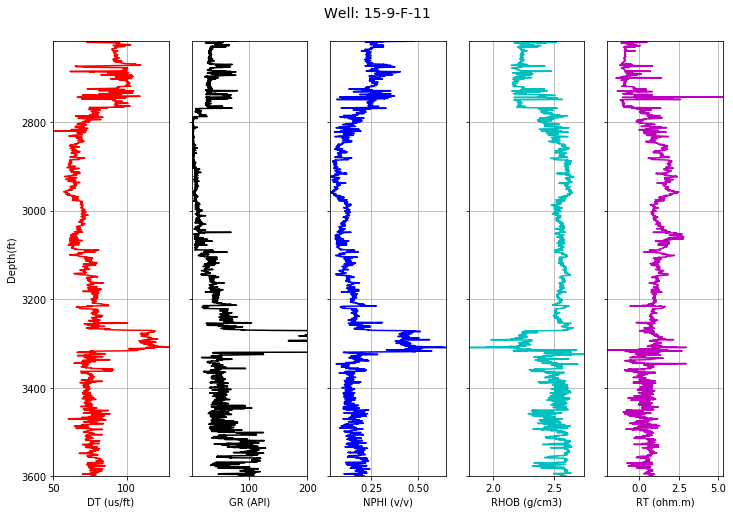

In [68]:
#df = pd.read_csv('f1.csv')
df1 = df.dropna()
test = pd.read_csv('edited.csv')
test = test.dropna()

log_plot1(test)

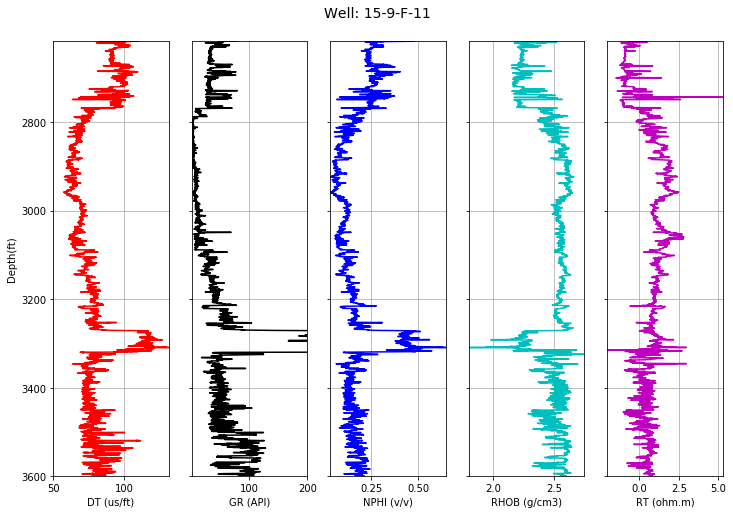

In [69]:
test['DT'] = pred_ext1
log_plot1(test)

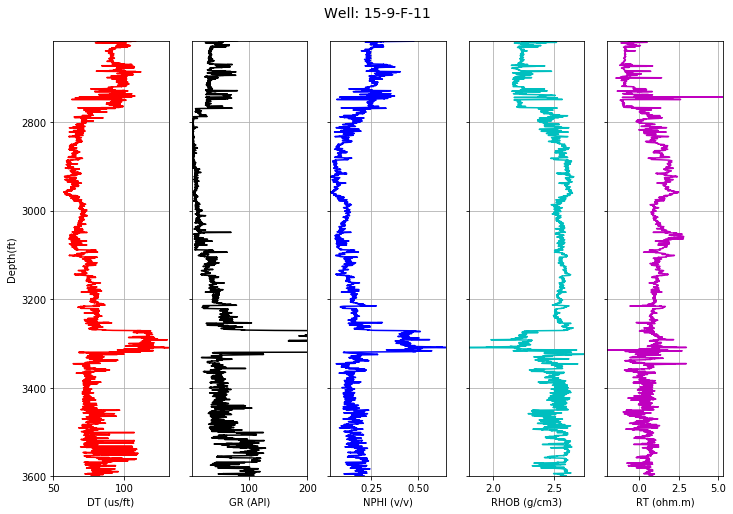

In [70]:
test['DT'] = pred_rf1
log_plot1(test)

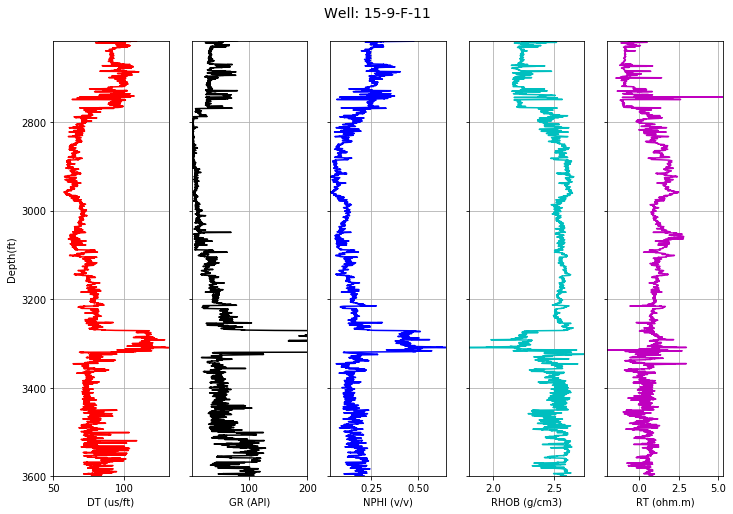

In [71]:
test['DT'] = avg1
log_plot1(test)

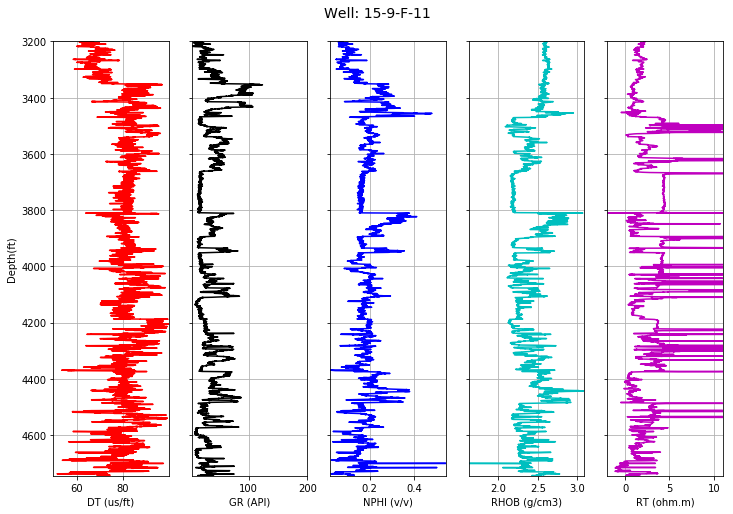

In [73]:
edited = pd.read_csv('11B.csv')

edited = edited.drop(['DEPTH'], axis=1)
edited = np.array(edited)

pred_ext2 = ext1.predict(edited)

edited = pd.read_csv('11B.csv')
edited['DT'] = pred_ext2

edited['RT'] = np.log(edited['RT'])
log_plot1(edited)

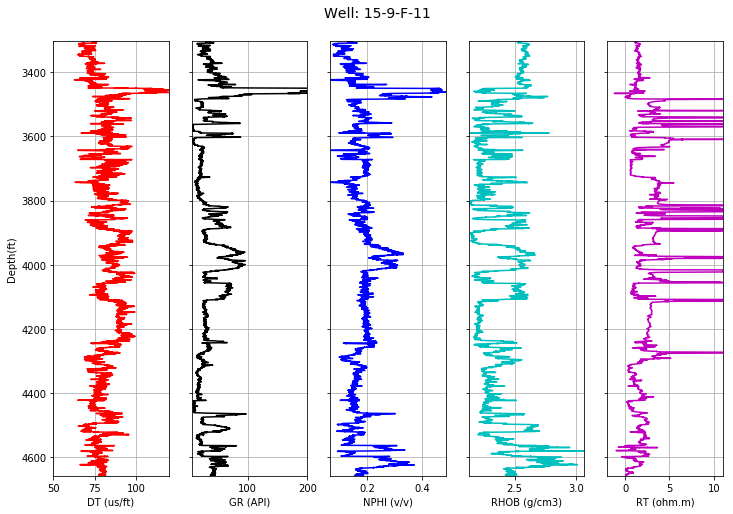

In [76]:
edited = pd.read_csv('15D.csv')

edited = edited.drop(['DEPTH'], axis=1)
edited = np.array(edited)

pred_ext2 = ext1.predict(edited)

edited = pd.read_csv('15D.csv')
edited['DT'] = pred_ext2

edited['RT'] = np.log(edited['RT'])
log_plot1(edited)

In [75]:
edited.head()

,GR,NPHI,RHOB,RT,DEPTH
0,9.040,0.077,2.599,9.525,3198.2
1,9.933,0.071,2.609,9.488,3198.3
2,10.037,0.069,2.609,9.467,3198.4
3,8.748,0.068,2.606,9.511,3198.5
4,9.243,0.067,2.601,9.437,3198.6
